In [24]:
import pandas as pd
from matplotlib.pyplot import *
from numpy import *
import matplotlib as mpl
import statsmodels.api as sm
mpl.rcParams['lines.linewidth'] = 1
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data = pd.read_csv('daily-total-female-births-CA.csv')

In [12]:
births = data.births.to_numpy()

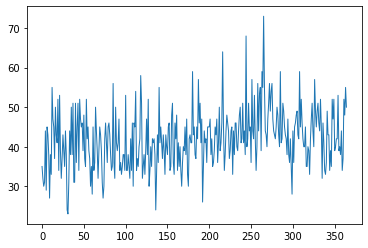

In [20]:
plot(births)

Text(0.5, 1.0, 'Difference series')

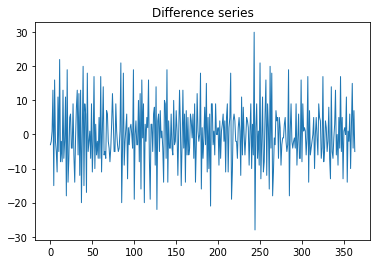

In [22]:
plot(diff(births))
title('Difference series')

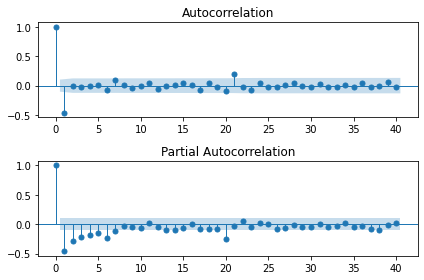

In [33]:
fig, ax = subplots(2,1)
sm.graphics.tsa.plot_acf(diff(births), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff(births), lags=40, ax=ax[1])
tight_layout()
show()

In [52]:
order_ops = [
    (0,1,1),
    (0,1,2),
    (7,1,1),
    (7,1,2)
]
for o in order_ops:
    m = sm.tsa.arima.ARIMA(births, order=o)
    res = m.fit()
    print(f"{','.join(map(str,o))} -- AIC: {res.aic}")


0,1,1 -- AIC: 2462.220924879084
0,1,2 -- AIC: 2459.5707560794262
7,1,1 -- AIC: 2464.8829777068054
7,1,2 -- AIC: 2466.666661232194


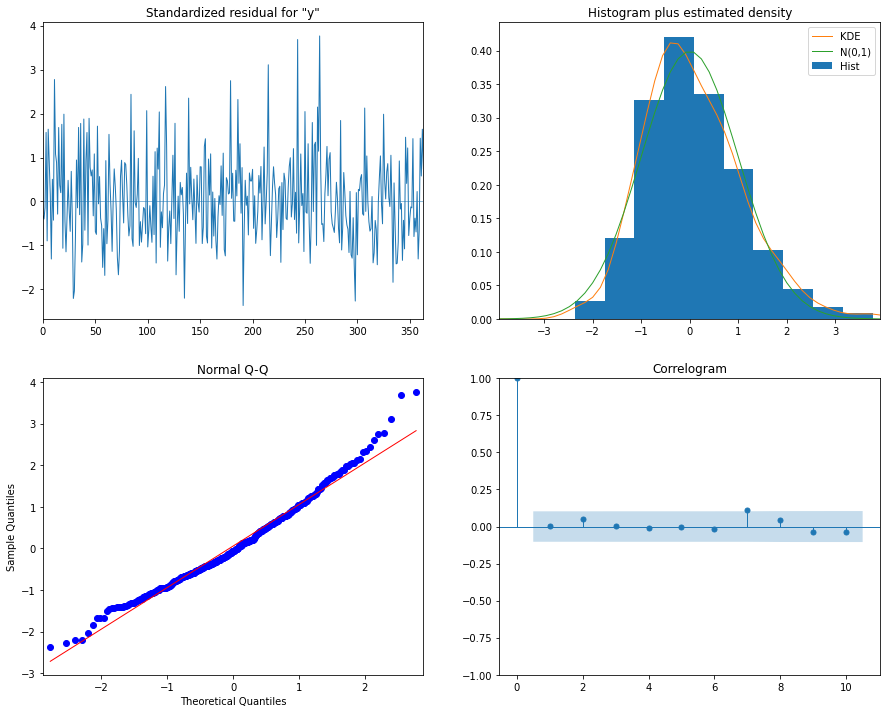

In [53]:
model = sm.tsa.arima.ARIMA(births, order=(0,1,2))
res = model.fit()

res.plot_diagnostics(figsize=(15,12))
show()